## Ford go bike rides Exploratory Data Analysis


<a id='Summary'></a>
### Data Summary

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- the dataset is collection of bike rides in many different start and end stations, bike_id, member_birth_year, user_type and duration_sec is the most intrested variable.
- I'm interested in how duration varies and who are likely to ride more.
- I cleaned the data from null and duplicated values to retain data effectiveness

##### I will try to answer the following questions:

 - which user type is riding more duration?
 - what is the most common gender ?
 - which birth years have the longest riding duration ?
 - what are the busiest start station and end station ?


In [1]:
# importing our libraries
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# Loading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Checking data for Null Values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
#Checking dataset for duplicates
df.duplicated().sum()

0

In [5]:
#dropping null values & making sure they're dropped correctly
df.dropna(inplace=True),df.isnull().sum()

(None,
 duration_sec               0
 start_time                 0
 end_time                   0
 start_station_id           0
 start_station_name         0
 start_station_latitude     0
 start_station_longitude    0
 end_station_id             0
 end_station_name           0
 end_station_latitude       0
 end_station_longitude      0
 bike_id                    0
 user_type                  0
 member_birth_year          0
 member_gender              0
 bike_share_for_all_trip    0
 dtype: int64)

In [6]:
#descriptive statistics for durations in seconds
df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [7]:
# Overview of data shape and composition
print(df.shape)
print(df.dtypes)

(174952, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [8]:
# Converting member_birth_year column type from float to int
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [9]:
# Converting start_time and end_time columns type from object to date_time 
df[["start_time", "end_time"]] = df[["start_time", "end_time"]].apply(pd.to_datetime)

In [10]:
# we will extract month, dayofweek, hour from the start_time
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')

In [11]:
def myHistPlot(df,xVar, normalize= False):
    '''
    function used to create histograms for different variables in the dataset
    '''
    df[xVar].value_counts(normalize=normalize).plot.bar(edgecolor='black', figsize =[14,8], rot =0, width = 0.9)
    plt.title(f'Distribution of {xVar}'.title(),fontsize=14,weight='bold')
    plt.xlabel(xVar.title(), fontsize=10,weight='bold')
    plt.ylabel('Frequency'.title(),fontsize=10,weight='bold')

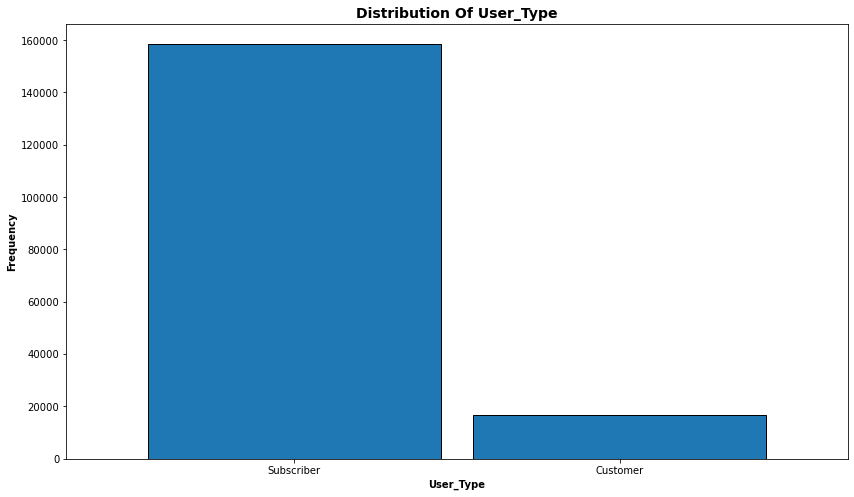

In [12]:
# Overview of most common user_type
myHistPlot(df,'user_type')

- Subscriber is the most common user type

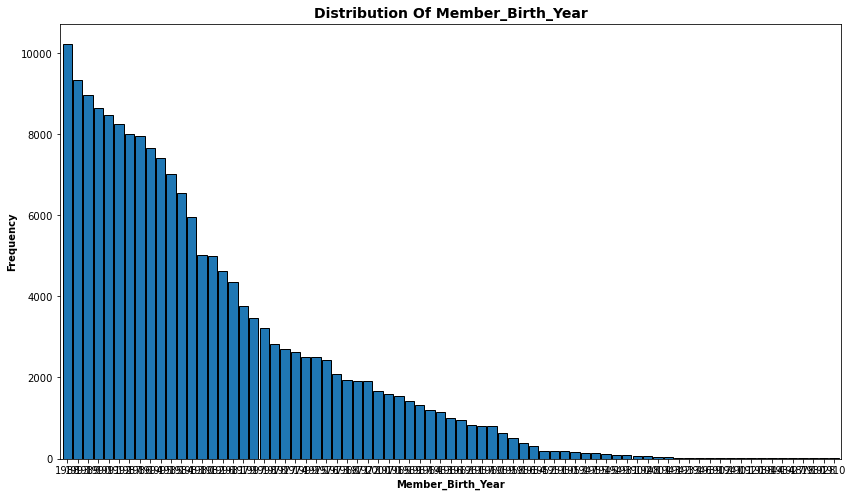

In [13]:
# Overview of most common member_brith_year
myHistPlot(df,'member_birth_year')

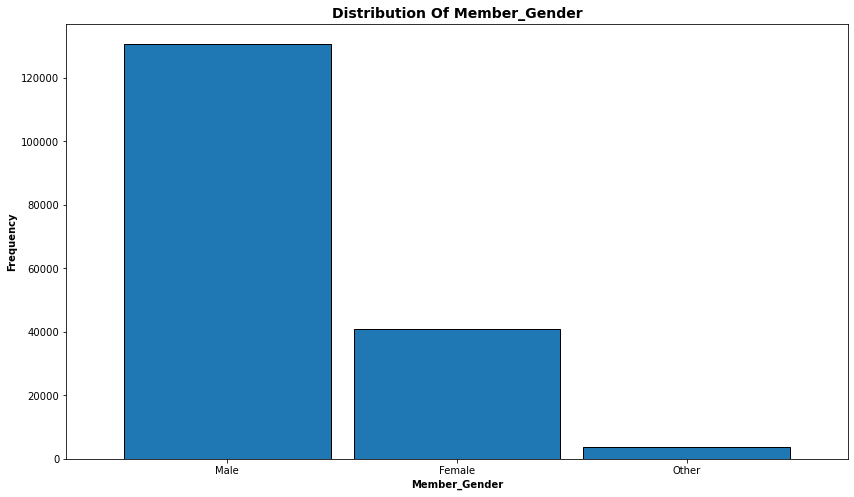

In [14]:
# Overview of most common genders
myHistPlot(df,'member_gender')

- Males are the most common gender

##### Bivariate Exploration of Data

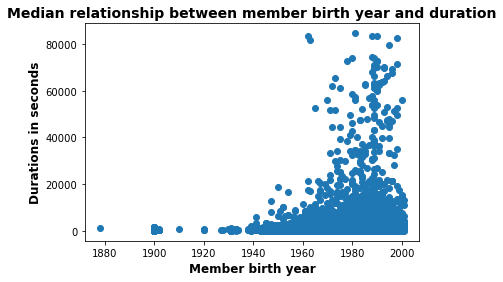

In [15]:
# Overview of relationship between member birth year and duration
plt.scatter(x=df.member_birth_year, y=df.duration_sec);
plt.title('Median relationship between member birth year and duration', fontsize = 14, weight='bold');
plt.ylabel('Durations in seconds',fontsize = 12, weight='bold')
plt.xlabel('Member birth year',fontsize = 12, weight='bold');

- Younger members ride more duration

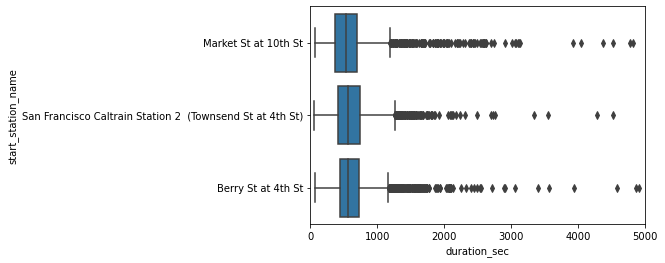

In [16]:
# top 3 start stations
top_stations = df['start_station_name'].value_counts().index[:3]
stations = df.loc[df['start_station_name'].isin(top_stations)]
sb.boxplot(data = stations, y = 'start_station_name', x = 'duration_sec',color = 'tab:blue');
plt.xlim(0, 5000);

- "Market St at 10th St" is the most busy start station
- "San Francisco Caltrain Station 2  (Townsend St at 4th St" is the second most busy start station
- "Berry St at 4th St" is the third most busy start station

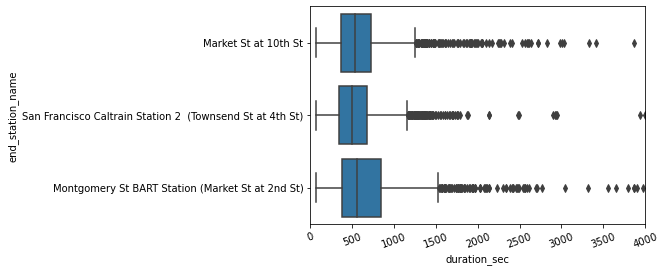

In [17]:
# top 3 end stations
top_stations = df['end_station_name'].value_counts().index[:3]
stations = df.loc[df['end_station_name'].isin(top_stations)]
plt.xticks(rotation = 20);
sb.boxplot(data = stations, y = 'end_station_name', x = 'duration_sec', color = 'tab:blue');
plt.xlim(0, 4000);

- "San Francisco Caltrain Station 2  (Townsend St at 4th St)" is the most busy end station
- "Market St at 10th St'" is the second most busy end station
- "Montgomery St BART Station (Market St at 2nd St)" is the third most busy end station

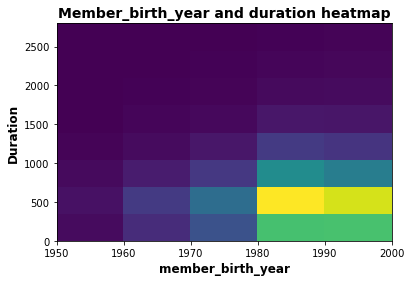

In [18]:
bins_y = np.arange(0, 3000, 350)
bins_x = np.arange(1950, 2005, 10)
plt.hist2d(( df['member_birth_year']),  df['duration_sec'],
           bins = [bins_x, bins_y])
plt.title('Member_birth_year and duration heatmap', fontsize=14, weight='bold')
plt.xlabel('member_birth_year', fontsize = 12, weight='bold')
plt.ylabel('Duration', fontsize = 12, weight='bold');

- Younger members are more likely to ride longer duration

In [19]:
# extracting hour, day and month from start_time column.
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')

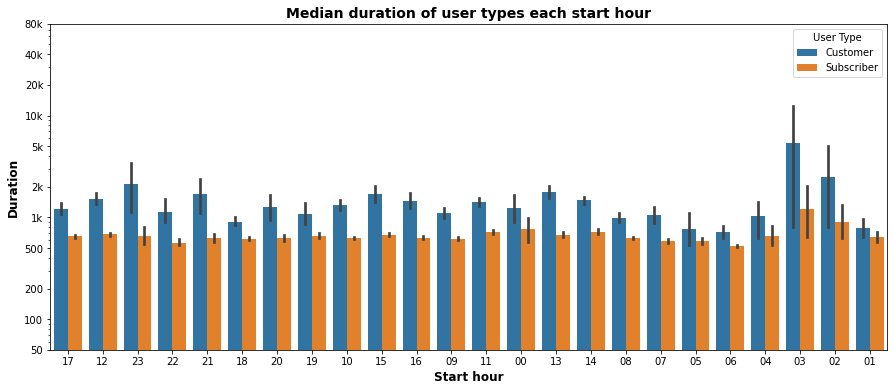

In [20]:
plt.figure(figsize=[15,6])
ax = sb.barplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,500, 1000, 2000, 5000, 10000, 20000,40000,80000], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);
plt.title('Median duration of user types each start hour', fontsize = 14, weight='bold');
plt.legend(title = 'User Type');
plt.xlabel('Start hour', fontsize = 12, weight='bold');
plt.ylabel('Duration', fontsize = 12, weight='bold');
plt.grid(False)

- Subscriber duration of rides time is longer than any hour at 2 AM, 3 AM
- Customer duration of rides time is longer than any hour at 3 AM, 4 AM

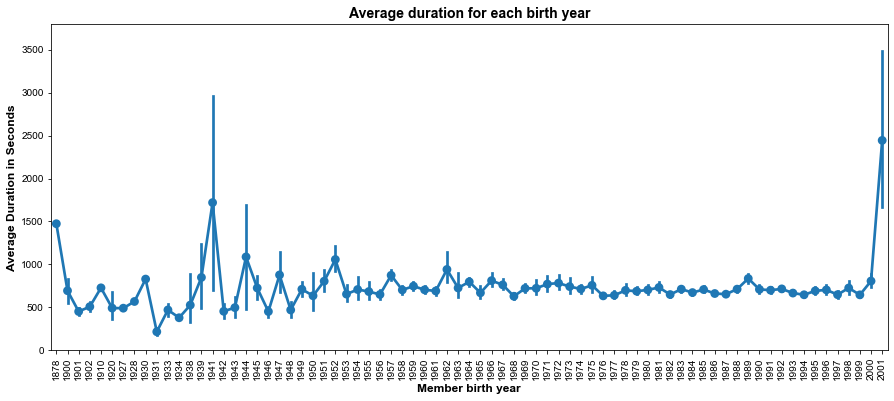

In [21]:
plt.figure(figsize = (15,6))
sb.pointplot(data = df.sort_values(by='member_birth_year'),x = 'member_birth_year', y = 'duration_sec')
plt.xticks(rotation = 90)
plt.title('Average duration for each birth year', fontsize = 14, weight='bold')
plt.ylabel('Average Duration in Seconds',fontsize = 12, weight='bold')
plt.xlabel('Member birth year',fontsize = 12, weight='bold')
plt.style.use('seaborn')
plt.grid(False)
plt.ylim(0, 3800);

- 2001 birth year has the hight average duration

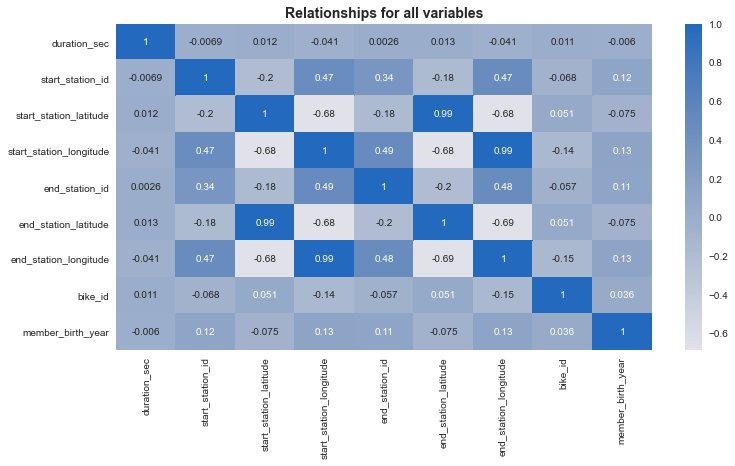

In [22]:
plt.figure(figsize=[12,6])
sb.heatmap(df.corr(), center = -1, annot = True, cmap = 'vlag_r')
plt.title('Relationships for all variables', fontsize= 14, weight= 'bold');

- Heatmap reveals different relationships between all variables

In [23]:
df.to_csv('cleaned_ford_go_bike_rides.csv')